In [37]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix



In [38]:
data = pd.read_csv(r"C:\Users\PC\Desktop\Machine_learning_model\well_logs.csv")

## data.head()

In [5]:
print(data[['GR', 'RT.OHMM', 'RXO.OHMM']].isnull().mean() * 100)


GR          0.0
RT.OHMM     0.0
RXO.OHMM    0.0
dtype: float64


In [6]:
data.replace(-999.25, np.nan, inplace=True)

In [7]:
data.head()

,DEPTH,GR,RT.OHMM,RXO.OHMM,TVD,TVDSS
0,0.0000,NaN,NaN,NaN,0.0000,-19.3200
1,0.1524,NaN,NaN,NaN,0.1524,-19.1676
2,0.3048,NaN,NaN,NaN,0.3048,-19.0152
3,0.4572,NaN,NaN,NaN,0.4572,-18.8628
4,0.6096,NaN,NaN,NaN,0.6096,-18.7104


In [8]:
data.isnull().sum()

DEPTH          0
GR          9732
RT.OHMM     9768
RXO.OHMM    9768
TVD            0
TVDSS          0
dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20870 entries, 0 to 20869
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   DEPTH     20870 non-null  float64
 1   GR        11138 non-null  float64
 2   RT.OHMM   11102 non-null  float64
 3   RXO.OHMM  11102 non-null  float64
 4   TVD       20870 non-null  float64
 5   TVDSS     20870 non-null  float64
dtypes: float64(6)
memory usage: 978.4 KB


In [10]:
key_logs = ['GR', 'RT.OHMM', 'RXO.OHMM']

In [11]:
data.dropna(subset=key_logs, how='all', inplace=True)

In [12]:
data[key_logs] = data[key_logs].interpolate(method='linear')

In [13]:
data.head(100)

,DEPTH,GR,RT.OHMM,RXO.OHMM,TVD,TVDSS
9516,1450.2384,16.1835,48.5948,32.8438,1449.1449,1429.8250
9517,1450.3909,19.4897,48.5947,32.8438,1449.2972,1429.9772
9518,1450.5432,22.7959,52.8343,35.7056,1449.4496,1430.1296
9519,1450.6957,26.1022,52.8343,35.7055,1449.6019,1430.2819
9520,1450.8480,26.1022,52.8338,35.7036,1449.7542,1430.4342
...,...,...,...,...,...,...
9611,1464.7164,100.7560,2.6704,2.5810,1463.6127,1444.2927
9612,1464.8688,95.6218,2.6846,2.4767,1463.7650,1444.4449
9613,1465.0212,95.4492,2.7264,2.4663,1463.9174,1444.5973
9614,1465.1736,93.7954,2.7002,2.4354,1464.0696,1444.7496


In [14]:
data.isnull().sum()

DEPTH       0
GR          0
RT.OHMM     0
RXO.OHMM    0
TVD         0
TVDSS       0
dtype: int64

In [15]:
def classify_formation(row):
    gr = row['GR']
    rt = row['RT.OHMM']
    
    if gr < 75 and rt > 50:
        return 'Clean Sandstone'
    elif gr > 150:
        return 'Shale'
    elif 75 <= gr <= 150:
        return 'Silty/Shaly Sand'
    else:
        return 'Unknown'


In [16]:
data['Formation'] = data.apply(classify_formation, axis=1)


In [17]:
data.head()

,DEPTH,GR,RT.OHMM,RXO.OHMM,TVD,TVDSS,Formation
9516,1450.2384,16.1835,48.5948,32.8438,1449.1449,1429.8250,Unknown
9517,1450.3909,19.4897,48.5947,32.8438,1449.2972,1429.9772,Unknown
9518,1450.5432,22.7959,52.8343,35.7056,1449.4496,1430.1296,Clean Sandstone
9519,1450.6957,26.1022,52.8343,35.7055,1449.6019,1430.2819,Clean Sandstone
9520,1450.8480,26.1022,52.8338,35.7036,1449.7542,1430.4342,Clean Sandstone


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11153 entries, 9516 to 20745
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   DEPTH      11153 non-null  float64
 1   GR         11153 non-null  float64
 2   RT.OHMM    11153 non-null  float64
 3   RXO.OHMM   11153 non-null  float64
 4   TVD        11153 non-null  float64
 5   TVDSS      11153 non-null  float64
 6   Formation  11153 non-null  object 
dtypes: float64(6), object(1)
memory usage: 697.1+ KB


In [16]:
data.reset_index()

,index,DEPTH,GR,RT.OHMM,RXO.OHMM,TVD,TVDSS,Formation
0,9516,1450.2384,16.1835,48.5948,32.8438,1449.1449,1429.8250,Unknown
1,9517,1450.3909,19.4897,48.5947,32.8438,1449.2972,1429.9772,Unknown
2,9518,1450.5432,22.7959,52.8343,35.7056,1449.4496,1430.1296,Clean Sandstone
3,9519,1450.6957,26.1022,52.8343,35.7055,1449.6019,1430.2819,Clean Sandstone
4,9520,1450.8480,26.1022,52.8338,35.7036,1449.7542,1430.4342,Clean Sandstone
...,...,...,...,...,...,...,...,...
11148,20741,3160.9285,47.3846,174.5488,157.0586,2501.8142,2482.4941,Clean Sandstone
11149,20742,3161.0808,47.3846,345.1575,148.1374,2501.8137,2482.4937,Clean Sandstone
11150,20743,3161.2332,47.3846,182.9605,128.4958,2501.8132,2482.4932,Clean Sandstone
11151,20744,3161.3857,47.3846,202.3819,140.9560,2501.8127,2482.4927,Clean Sandstone


In [19]:
data.reset_index(drop=True, inplace=True)


In [39]:
data.head(100)

,DEPTH,GR,RT.OHMM,RXO.OHMM,TVD,TVDSS
0,0.0000,-999.25,-999.25,-999.25,0.0000,-19.3200
1,0.1524,-999.25,-999.25,-999.25,0.1524,-19.1676
2,0.3048,-999.25,-999.25,-999.25,0.3048,-19.0152
3,0.4572,-999.25,-999.25,-999.25,0.4572,-18.8628
4,0.6096,-999.25,-999.25,-999.25,0.6096,-18.7104
...,...,...,...,...,...,...
95,14.4780,-999.25,-999.25,-999.25,14.4780,-4.8420
96,14.6304,-999.25,-999.25,-999.25,14.6304,-4.6896
97,14.7828,-999.25,-999.25,-999.25,14.7828,-4.5372
98,14.9352,-999.25,-999.25,-999.25,14.9352,-4.3848


In [ ]:
data.

In [20]:
data["Formation"].value_counts()

Formation
Silty/Shaly Sand    4526
Unknown             4266
Clean Sandstone     2275
Shale                 86
Name: count, dtype: int64

In [21]:
data_binary = data[data['Formation'].isin(['Clean Sandstone', 'Shale'])].copy()


In [22]:
data_binary['Label']= data['Formation'].map({'Clean Sandstone':1, 'Shale':0})

In [25]:
data_binary.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2361 entries, 2 to 11152
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   DEPTH      2361 non-null   float64
 1   GR         2361 non-null   float64
 2   RT.OHMM    2361 non-null   float64
 3   RXO.OHMM   2361 non-null   float64
 4   TVD        2361 non-null   float64
 5   TVDSS      2361 non-null   float64
 6   Formation  2361 non-null   object 
 7   Label      2361 non-null   float64
dtypes: float64(7), object(1)
memory usage: 166.0+ KB


In [34]:
data_binary['Formation'].value_counts()

Formation
Clean Sandstone    2275
Shale                86
Name: count, dtype: int64

In [24]:
X = data_binary[['GR', 'RT.OHMM', 'RXO.OHMM']]  # or any other features you're using
y = data_binary['Formation']  # this should now be 0s and 1s


In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    X,y, test_size= 0.3, stratify=y, random_state=42)

In [28]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [31]:
y_pred = model.predict(X_test)  # Make predictions on the test set


In [32]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

cv = StratifiedKFold(n_splits=5)
scores = cross_val_score(model, X, y, cv=cv)
print(scores.mean())  # Average accuracy across all 5 splits


0.9974630021141649


In [33]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


                 precision    recall  f1-score   support

Clean Sandstone       1.00      1.00      1.00       683
          Shale       1.00      1.00      1.00        26

       accuracy                           1.00       709
      macro avg       1.00      1.00      1.00       709
   weighted avg       1.00      1.00      1.00       709

[[683   0]
 [  0  26]]


In [34]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5)  # 5-fold cross-validation
print("Cross-validation scores:", scores)
print("Average CV score:", scores.mean())


Cross-validation scores: [0.98731501 1.         1.         1.         1.        ]
Average CV score: 0.9974630021141649


<Axes: >

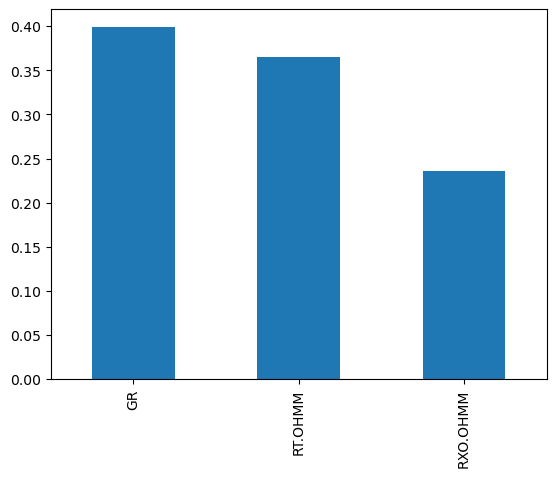

In [35]:
import pandas as pd

feature_importance = pd.Series(model.feature_importances_, index=X.columns)
feature_importance.sort_values(ascending=False).plot(kind='bar')


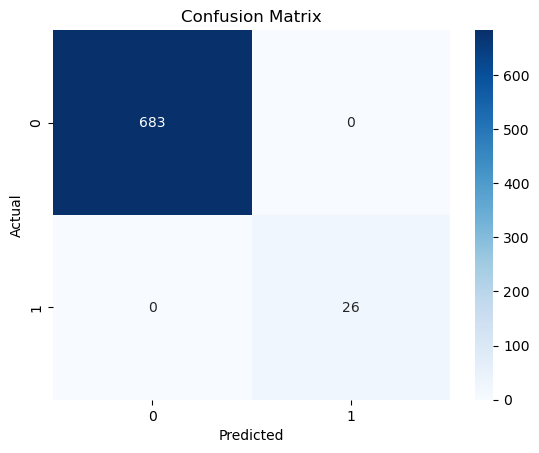

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

